 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [94]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


C:\Users\sai kiran kocherla\AppData\Local\Temp\ipykernel_15652\2325305429.py:67: RuntimeWarning: invalid value encountered in scalar divide
  loss = -np.sum(np.log(outps[range(m), targets])) / m


Epoch 1/30, Training Accuracy: 0.9148, Validation Accuracy: 0.9310
Epoch 11/30, Training Accuracy: 0.9794, Validation Accuracy: 0.9732
Epoch 21/30, Training Accuracy: 0.9919, Validation Accuracy: 0.9785
Epoch 30/30, Training Accuracy: 0.9971, Validation Accuracy: 0.9793
Test Accuracy: 0.9786


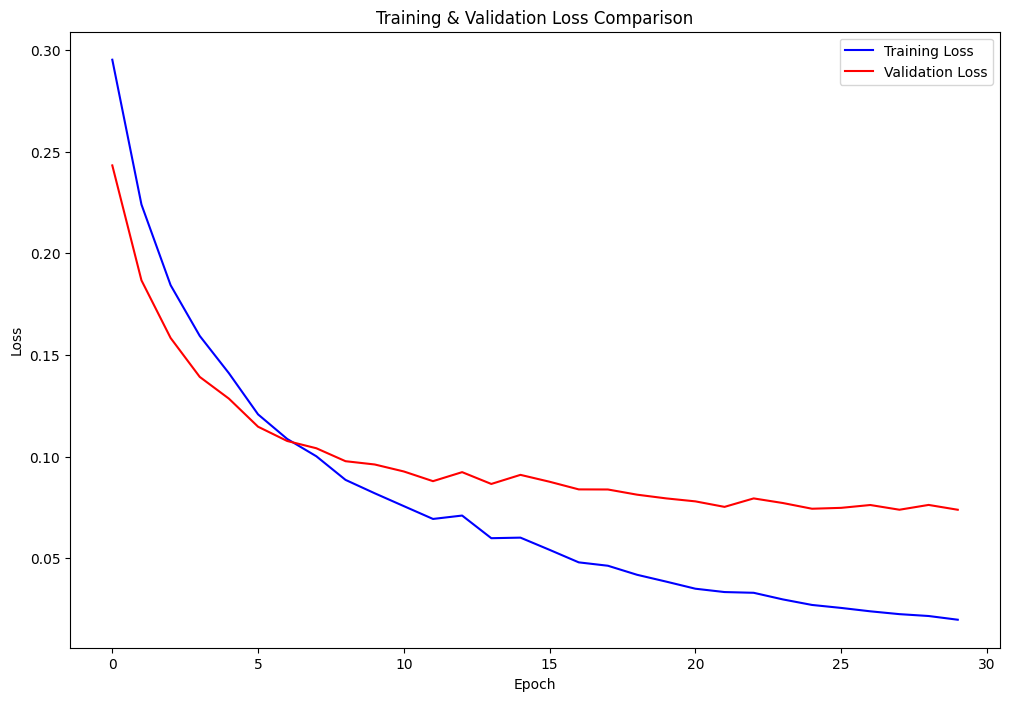

In [139]:
import numpy as np
import torchvision.datasets as datasets

##################################################
#Load MNIST data.
##################################################
mnist_trainset = datasets.MNIST(root='./Downloads', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./Downloads', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp=np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp=np.where(inp > 0, 1, 0)
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  exps=np.exp(inp - np.max(inp, axis=1, keepdims=True))
  outp=exps / np.sum(exps, axis=1, keepdims=True)
  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  z1 = np.dot(inputs, W1)
  a1 = ReLu(z1)
  z2 = np.dot(a1, W2)
  a2 = ReLu(z2)
  z3 = np.dot(a2, W3)
  outp = softmax(z3)
  #Return the requires outputs, i.e., final output and intermediate activations
  return outp, [a1, a2]

#Complete the below function to compute the gradients
def computeGradients(inputs, targets,weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights
  a1, a2 = activations
  outps,_ = fwdPropagate(inputs,weights)
  #Compute the loss
  epsilon = 1e-8
  outps = np.clip(outps, epsilon, 1 - epsilon)
  
  # Compute the loss
  m = inputs.shape[0]
  loss = -np.sum(np.log(outps[range(m), targets])) / m
  # Compute the derivative of loss at parameters
  dz3 = outps
  dz3[range(m), targets] -= 1
  dz3 /= m
  dj_dw3 = np.dot(a2.T, dz3)
  da2 = np.dot(dz3, W3.T)
  dz2 = da2 * gradReLu(a2)
  dj_dw2 = np.dot(a1.T, dz2)
  da1 = np.dot(dz2, W2.T)
  dz1 = da1 * gradReLu(a1)
  dj_dw1 = np.dot(inputs.T, dz1)
  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3],loss

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 -= learning_rate * dj_dw1
  W2 -= learning_rate * dj_dw2
  W3 -= learning_rate * dj_dw3
  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
  # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  # Compute the gradients
  gradients,loss = computeGradients(inputs, targets, weights, activations)
  # Update the parameters using gradients
  weights = applyGradients(weights, gradients, learning_rate)
  # Return the updated parameters
  return weights,loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = n_samples // batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split_idx = int(train_val_split * n_samples)
  train_inputs, val_inputs = inputs[:split_idx], inputs[split_idx:]
  train_targets, val_targets = targets_idx[:split_idx], targets_idx[split_idx:]
  
  #Randomly initialize the weights
  W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
  W2 = np.random.randn(hidden_units, hidden_units) * 0.01
  W3 = np.random.randn(hidden_units, n_classes) * 0.01
  weights = [W1, W2, W3]
  train_loss=[]
  val_loss=[]
  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    indices = np.random.permutation(len(train_inputs))
    train_inputs_shuffled = train_inputs[indices]
    train_targets_shuffled = train_targets[indices]
    # print(train_inputs_shuffled.shape)
    # print(np.unique(train_targets_shuffled,return_counts=True))
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start_idx = batch * batch_size
      end_idx = start_idx + batch_size
      x_batch = train_inputs_shuffled[start_idx:end_idx]

      y_batch = train_targets_shuffled[start_idx:end_idx]
      
      
      #Forward propagation
      _, activations = fwdPropagate(x_batch, weights)
      
      #Backward propagation
      weights,loss = backPropagate(x_batch, y_batch, weights, activations, learning_rate)
    train_accuracy,t_loss = evaluate_accuracy(train_inputs, train_targets, weights)
    val_accuracy,v_loss = evaluate_accuracy(val_inputs, val_targets, weights)
    train_loss.append(t_loss)
    val_loss.append(v_loss)
    if epoch%10==0 or epoch==(epochs-1):
        print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
  return weights,train_loss,val_loss
def evaluate_accuracy(inputs, targets_idx, weights):
    outp, _ = fwdPropagate(inputs, weights)
    predictions = np.argmax(outp, axis=1)
    accuracy = np.mean(predictions == targets_idx)
    train_error = -np.mean(np.log(outp[range(inputs.shape[0]), targets_idx]))
    return accuracy,train_error
#Call the training function to train the network
weights_tr,train_loss,val_loss=training(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################
test_inputs = mnist_testdata.reshape(-1, 28*28)
test_targets = mnist_testlabel
W1, W2, W3 = weights_tr
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy = np.mean(test_predictions == test_targets)
print(f"Test Accuracy: {test_accuracy:.4f}")
plt.figure(figsize=(12,8))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Comparison')
plt.legend()
plt.show()

<b> Report your observations </b>

1. The Training loss and validation was very less made us to conclude that neural network was trained well.

2. The train accuracy and test accuracy was inreased from intial epoch to final epoch.

3. On setting the learning rate high, the performance decreases with time.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



Epoch 1/30, Training Accuracy: 0.9167, Validation Accuracy: 0.9215
Epoch 11/30, Training Accuracy: 0.9786, Validation Accuracy: 0.9664
Epoch 21/30, Training Accuracy: 0.9920, Validation Accuracy: 0.9721
Epoch 30/30, Training Accuracy: 0.9967, Validation Accuracy: 0.9743
Training with reLu, gradReLu activation functions completed
Epoch 1/30, Training Accuracy: 0.1140, Validation Accuracy: 0.1060
Epoch 11/30, Training Accuracy: 0.3839, Validation Accuracy: 0.3808
Epoch 21/30, Training Accuracy: 0.6021, Validation Accuracy: 0.6122
Epoch 30/30, Training Accuracy: 0.7322, Validation Accuracy: 0.7462
Training with sigmoid, gradSigmoid activation functions completed
Epoch 1/30, Training Accuracy: 0.6960, Validation Accuracy: 0.7149
Epoch 11/30, Training Accuracy: 0.9163, Validation Accuracy: 0.9122
Epoch 21/30, Training Accuracy: 0.9422, Validation Accuracy: 0.9300
Epoch 30/30, Training Accuracy: 0.9552, Validation Accuracy: 0.9362
Training with tanh, gradTanh activation functions completed
E

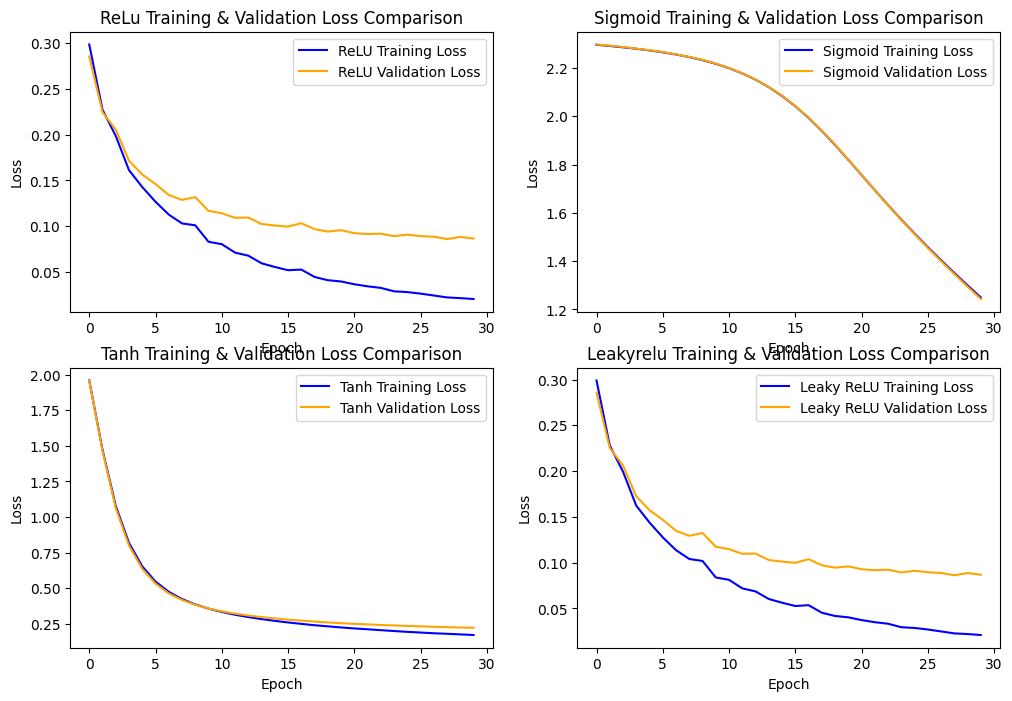

In [135]:
##################################################
#Train the network with different activation functions
##################################################
#sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
#gradient of sigmoid activation function
def gradSigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
#tanh activation function
def tanh(x):
    return np.tanh(x)
#gradient of tanh activation function
def gradTanh(x):
    return 1 - np.tanh(x)**2
#Leaky ReLU activation function
def leakyReLU(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)
#gradient of Leaky ReLU activation function
def gradLeakyReLU(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)
# Define the training function for a given activation function
def train_with_activation_function(inputs, targets_idx, activation_func, grad_activation_func, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    # Split the training data into two parts.
    split_idx = int(train_val_split * n_samples)
    train_inputs, val_inputs = inputs[:split_idx], inputs[split_idx:]
    train_targets, val_targets = targets_idx[:split_idx], targets_idx[split_idx:]
    # Randomly initialize the weights
    np.random.seed(0)
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]
    train_loss=[]
    val_loss=[]
    # Interate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(train_inputs))
        train_inputs_shuffled = train_inputs[indices]
        train_targets_shuffled = train_targets[indices]
        # Interate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = start_idx + batch_size
            x_batch = train_inputs_shuffled[start_idx:end_idx]
            y_batch = train_targets_shuffled[start_idx:end_idx]
            # Forward propagation
            z1 = np.dot(x_batch, W1)
            a1 = activation_func(z1)
            z2 = np.dot(a1, W2)
            a2 = activation_func(z2)
            z3 = np.dot(a2, W3)
            outp = softmax(z3)
            # Backward propagation
            m = x_batch.shape[0]
            # loss = -np.sum(np.log(outp[range(m), y_batch])) / m
            # Compute the derivative of loss at parameters
            dz3 = outp
            dz3[range(m), y_batch] -= 1
            dz3 /= m
            dW3 = np.dot(a2.T, dz3)
            da2 = np.dot(dz3, W3.T)
            dz2 = da2 * grad_activation_func(z2)
            dW2 = np.dot(a1.T, dz2)
            da1 = np.dot(dz2, W2.T)
            dz1 = da1 * grad_activation_func(z1)
            dW1 = np.dot(x_batch.T, dz1)
            # Update the weights using gradient descent
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
            W3 -= learning_rate * dW3
        # Compute training and validation accuracy
        train_accuracy,t_loss = evaluate_accuracy(train_inputs, train_targets, weights, activation_func)
        val_accuracy,v_loss = evaluate_accuracy(val_inputs, val_targets, weights, activation_func)
        train_loss.append(t_loss)
        val_loss.append(v_loss)
        if epoch%10==0 or epoch==(epochs-1):
         print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return weights,train_loss,val_loss
def fwdPropagate_act(inputs, weights,activations):
    W1, W2, W3 = weights
    #print(activations)
    # First layer
    Z1 = np.dot(inputs, W1)
    A1 = activations(Z1)
    # Second layer
    Z2 = np.dot(A1, W2)
    A2 = activations(Z2)
    # Third (output) layer
    Z3 = np.dot(A2, W3)
    outps = softmax(Z3)
    return outps, [A1, A2]
# Define a function to evaluate accuracy
def evaluate_accuracy(inputs, targets_idx, weights, activation_func):
    outp, _ = fwdPropagate_act(inputs, weights, activation_func)
    predictions = np.argmax(outp, axis=1)
    accuracy = np.mean(predictions == targets_idx)
    train_error = -np.mean(np.log(outp[range(inputs.shape[0]), targets_idx]))
    return accuracy,train_error
# Call the training function for different activation functions
##################################################
#Evaluate the performance on MNIST test data
##################################################
test_inputs = mnist_testdata.reshape(-1, 28*28)
test_targets = mnist_testlabel
weights_relu,train_loss_relu,val_loss_relu = train_with_activation_function(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel,ReLu, gradReLu)
W1, W2, W3 = weights_relu
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_relu = np.mean(test_predictions == test_targets)
print("Training with reLu, gradReLu activation functions completed")
weights_sigmoid,train_loss_sigmoid,val_loss_sigmoid = train_with_activation_function(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, sigmoid, gradSigmoid)
W1, W2, W3 = weights_sigmoid
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_sigmoid = np.mean(test_predictions == test_targets)
print("Training with sigmoid, gradSigmoid activation functions completed")
weights_tanh,train_loss_tanh,val_loss_tanh = train_with_activation_function(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, tanh, gradTanh)
W1, W2, W3 = weights_tanh
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_tanh = np.mean(test_predictions == test_targets)
print("Training with tanh, gradTanh activation functions completed")
weights_leakyReLU,train_loss_leakyrelu,val_loss_leakyrelu = train_with_activation_function(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, leakyReLU, gradLeakyReLU)
W1, W2, W3 = weights_leakyReLU
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_leakyrelu = np.mean(test_predictions == test_targets)
print("Training with leakyReLU, gradLeakyReLU activation functions completed")
print("#"*100)
print("#"*100)
print(f"Test Accuracy - ReLu,gradRelu: {test_accuracy_relu:.4f}")
print(f"Test Accuracy-sigmoid, gradSigmoid: {test_accuracy_sigmoid:.4f}")
print(f"Test Accuracy-tanh, gradTanh: {test_accuracy_tanh:.4f}")
print(f"Test Accuracy-leakyReLU, gradLeakyReLU: {test_accuracy_leakyrelu:.4f}")
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(train_loss_relu, label='ReLU Training Loss', color='blue')
plt.plot(val_loss_relu, label='ReLU Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLu Training & Validation Loss Comparison')
plt.legend()
plt.subplot(2,2,2)
plt.plot(train_loss_sigmoid, label='Sigmoid Training Loss', color='blue')
plt.plot(val_loss_sigmoid, label='Sigmoid Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Sigmoid Training & Validation Loss Comparison')
plt.legend()
plt.subplot(2,2,3)
plt.plot(train_loss_tanh, label='Tanh Training Loss', color='blue')
plt.plot(val_loss_tanh, label='Tanh Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Tanh Training & Validation Loss Comparison')
plt.legend()
plt.subplot(2,2,4)
plt.plot(train_loss_leakyrelu, label='Leaky ReLU Training Loss', color='blue')
plt.plot(val_loss_leakyrelu, label='Leaky ReLU Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Leakyrelu Training & Validation Loss Comparison')
plt.legend()
plt.show()

<b> Report your observations </b>

1. ReLu,gradReLu activation functions was performed well among all other activation functions.

2. ReLu and LeakyRelu were almost have same accuracies as leakyReLu performs similar to ReLu but with very small gradient change rather than 0.

3. Trained NN with Sigmoid and Gradsigmoid Activation functions performed bad compared to other fucntions as there is no  sparsity in sigmoid led to redundancy issues.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

Epoch 1/30, Training Accuracy: 0.1140, Validation Accuracy: 0.1060
Epoch 11/30, Training Accuracy: 0.1140, Validation Accuracy: 0.1060
Epoch 21/30, Training Accuracy: 0.3706, Validation Accuracy: 0.3702
Epoch 30/30, Training Accuracy: 0.5613, Validation Accuracy: 0.5737


C:\Users\sai kiran kocherla\AppData\Local\Temp\ipykernel_15652\931258504.py:69: RuntimeWarning: invalid value encountered in scalar divide
  loss = -np.sum(np.log(outp[range(m), y_batch])) / m


Epoch 1/30, Training Accuracy: 0.9145, Validation Accuracy: 0.9161


C:\Users\sai kiran kocherla\AppData\Local\Temp\ipykernel_15652\4446994.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 11/30, Training Accuracy: 0.9492, Validation Accuracy: 0.9482
Epoch 21/30, Training Accuracy: 0.9490, Validation Accuracy: 0.9460
Epoch 30/30, Training Accuracy: 0.9547, Validation Accuracy: 0.9513
####################################################################################################
####################################################################################################
Accuracy on MNIST test data:
SGD: 0.6170
Adam: 0.8874


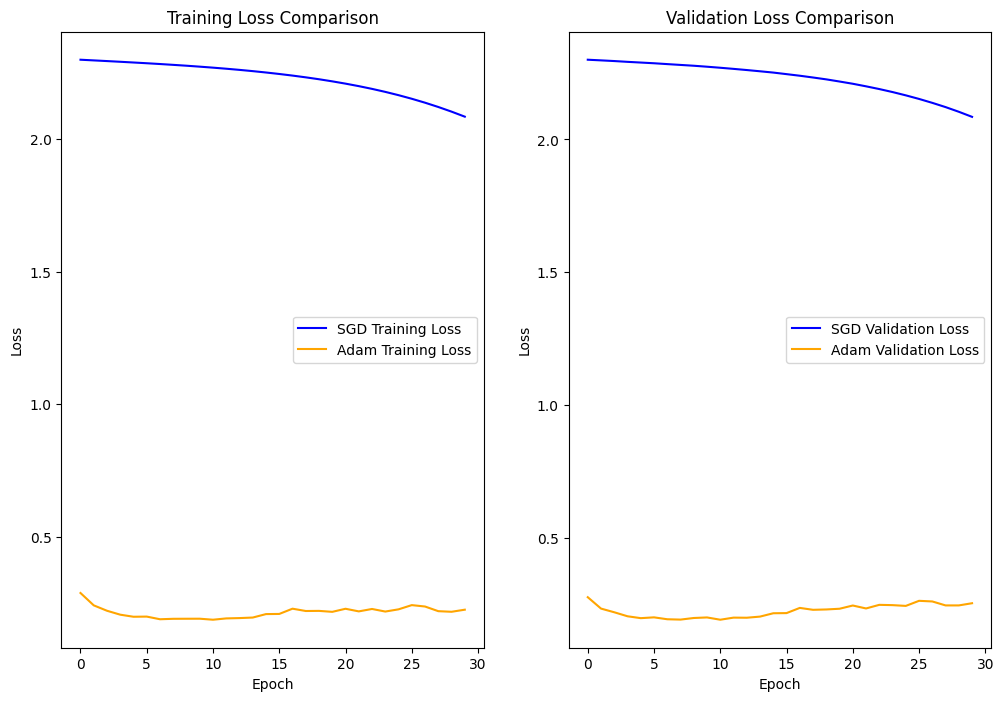

In [146]:
##################################################
#Train the network using Adam optimizer
##################################################
# Define the Adam optimization algorithm
#Complete the below function to impliment ReLU activation function
def adam(weights, gradients, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Adam optimization algorithm.
    """
    W1, W2, W3 = weights
    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]  # First moment estimate
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]  # Second moment estimate
    t = 0  # Initiazing Time step
    for dW in range(len(gradients)):
        t += 1
        m[dW] = beta1 * m[dW] + (1 - beta1) * gradients[dW]
        v[dW] = beta2 * v[dW] + (1 - beta2) * (gradients[dW] ** 2)
        m_hat = m[dW] / (1 - beta1 ** t)
        v_hat = v[dW] / (1 - beta2 ** t)
        weights[dW] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    return weights

# Define the training function using Adam optimization algorithm
def train_with_adam(inputs, targets_idx, activation_func, grad_activation_func, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.0005):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_idx = int(train_val_split * n_samples)
    train_inputs, val_inputs = inputs[:split_idx], inputs[split_idx:]
    train_targets, val_targets = targets_idx[:split_idx], targets_idx[split_idx:]
    np.random.seed(0)
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]
    train_loss=[]
    val_loss=[]
    # Interate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(train_inputs))
        train_inputs_shuffled = train_inputs[indices]
        train_targets_shuffled = train_targets[indices]
        # Interate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = start_idx + batch_size
            x_batch = train_inputs_shuffled[start_idx:end_idx]
            y_batch = train_targets_shuffled[start_idx:end_idx]
            # Forward propagation
            z1 = np.dot(x_batch, W1)
            a1 = activation_func(z1)
            z2 = np.dot(a1, W2)
            a2 = activation_func(z2)
            z3 = np.dot(a2, W3)
            outp = softmax(z3)
            # Backward propagation
            m = x_batch.shape[0]
            loss = -np.sum(np.log(outp[range(m), y_batch])) / m
            # Compute the derivative of loss at parameters
            dz3 = outp
            dz3[range(m), y_batch] -= 1
            dz3 /= m
            dW3 = np.dot(a2.T, dz3)
            da2 = np.dot(dz3, W3.T)
            dz2 = da2 * grad_activation_func(z2)
            dW2 = np.dot(a1.T, dz2)
            da1 = np.dot(dz2, W2.T)
            dz1 = da1 * grad_activation_func(z1)
            dW1 = np.dot(x_batch.T, dz1)
            # Compute the gradients
            gradients = [dW1, dW2, dW3]
            # Update the weights using Adam optimization algorithm
            weights = adam(weights, gradients, learning_rate)
        # Compute training and validation accuracy
        train_accuracy,t_loss = evaluate_accuracy(train_inputs, train_targets, weights, activation_func)
        val_accuracy,v_loss = evaluate_accuracy(val_inputs, val_targets, weights, activation_func)
        train_loss.append(t_loss)
        val_loss.append(v_loss)
        if epoch%10==0 or epoch==(epochs-1):
         print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return weights,train_loss,val_loss
def evaluate_accuracy(inputs, targets_idx, weights, activation_func):
    outp, _ = fwdPropagate_act(inputs, weights, activation_func)
    predictions = np.argmax(outp, axis=1)
    accuracy = np.mean(predictions == targets_idx)
    train_error = -np.mean(np.log(outp[range(inputs.shape[0]), targets_idx]))
    return accuracy,train_error
##################################################
#Compare the accuracies and report your observations
##################################################
# Train the network using SGD optimization algorithm
weights_sgd,train_loss_sgd,val_loss_sgd = train_with_activation_function(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel,sigmoid,gradSigmoid,epochs=30, learning_rate=0.0005)
# Evaluate accuracy on test data for SGD
W1, W2, W3 = weights_sgd
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_sgd = np.mean(test_predictions == test_targets)
# Train the network using Adam optimization algorithm
weights_adam,train_loss_adam,val_loss_adam = train_with_adam(mnist_traindata.reshape(-1,28*28), mnist_trainlabel,sigmoid,gradSigmoid,epochs=30)
W1, W2, W3 = weights_adam
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_adam = np.mean(test_predictions == test_targets)
# Report the accuracies and plot the comparision of losses
print("#"*100)
print("#"*100)
print("Accuracy on MNIST test data:")
print(f"SGD: {test_accuracy_sgd:.4f}")
print(f"Adam: {test_accuracy_adam:.4f}")
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(train_loss_sgd, label='SGD Training Loss', color='blue')
plt.plot(train_loss_adam, label='Adam Training Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.subplot(1,2,2)
plt.plot(val_loss_sgd, label='SGD Validation Loss', color='blue')
plt.plot(val_loss_adam, label='Adam Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

<b> Report your observations </b>

1. To view the clear observation of SGD and Adam Sigmoid and Grad Sigmoid Activation functions were used and trained the network with learning rate 0.0005 and 30 epoches were given.

2. The validation error and training error of SGD clearly high compared to adam optimization errors led to the accuracy of SGD is 61% and Adam accuracy is 88%

3. The accuracy is effected by the learning rate.As Adam adapts the learning rates for each parameter based on the first and second moments of the gradients led to the increased accuracy but learning rate greatly effected the SGD optimizer.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


C:\Users\sai kiran kocherla\AppData\Local\Temp\ipykernel_15652\94303768.py:50: RuntimeWarning: invalid value encountered in scalar divide
  loss = -np.sum(np.log(outp[range(m), y_batch])) / m


Epoch 1/30, Training Accuracy: 0.9166, Validation Accuracy: 0.9214
Epoch 11/30, Training Accuracy: 0.9779, Validation Accuracy: 0.9663
Epoch 21/30, Training Accuracy: 0.9906, Validation Accuracy: 0.9723
Epoch 30/30, Training Accuracy: 0.9950, Validation Accuracy: 0.9749
---------------Trained the network with L2-regularization----------------
Accuracy with L2 regularization: 0.9773
####################################################################################################
####################################################################################################
Epoch 1/30, Training Accuracy: 0.7651, Validation Accuracy: 0.7762


C:\Users\sai kiran kocherla\AppData\Local\Temp\ipykernel_15652\931258504.py:101: RuntimeWarning: divide by zero encountered in log
  train_error = -np.mean(np.log(outp[range(inputs.shape[0]), targets_idx]))
C:\Users\sai kiran kocherla\AppData\Local\Temp\ipykernel_15652\94303768.py:139: RuntimeWarning: overflow encountered in multiply
  a2 *= dropout_mask2 / dropout_prob
C:\Users\sai kiran kocherla\AppData\Local\Temp\ipykernel_15652\94303768.py:139: RuntimeWarning: invalid value encountered in multiply
  a2 *= dropout_mask2 / dropout_prob


Epoch 11/30, Training Accuracy: 0.0985, Validation Accuracy: 0.0995
Epoch 21/30, Training Accuracy: 0.0985, Validation Accuracy: 0.0995
Epoch 30/30, Training Accuracy: 0.0985, Validation Accuracy: 0.0995
-------------Trained the network with deopout probability 0.2-------------
Epoch 1/30, Training Accuracy: 0.8335, Validation Accuracy: 0.8478
Epoch 11/30, Training Accuracy: 0.8949, Validation Accuracy: 0.9011
Epoch 21/30, Training Accuracy: 0.9228, Validation Accuracy: 0.9263
Epoch 30/30, Training Accuracy: 0.9302, Validation Accuracy: 0.9330
-------------Trained the network with deopout probability 0.3-------------
Epoch 1/30, Training Accuracy: 0.8867, Validation Accuracy: 0.8942
Epoch 11/30, Training Accuracy: 0.9334, Validation Accuracy: 0.9367
Epoch 21/30, Training Accuracy: 0.9493, Validation Accuracy: 0.9484
Epoch 30/30, Training Accuracy: 0.9454, Validation Accuracy: 0.9432
-------------Trained the network with deopout probability 0.5-------------
Accuracy with dropout with pr

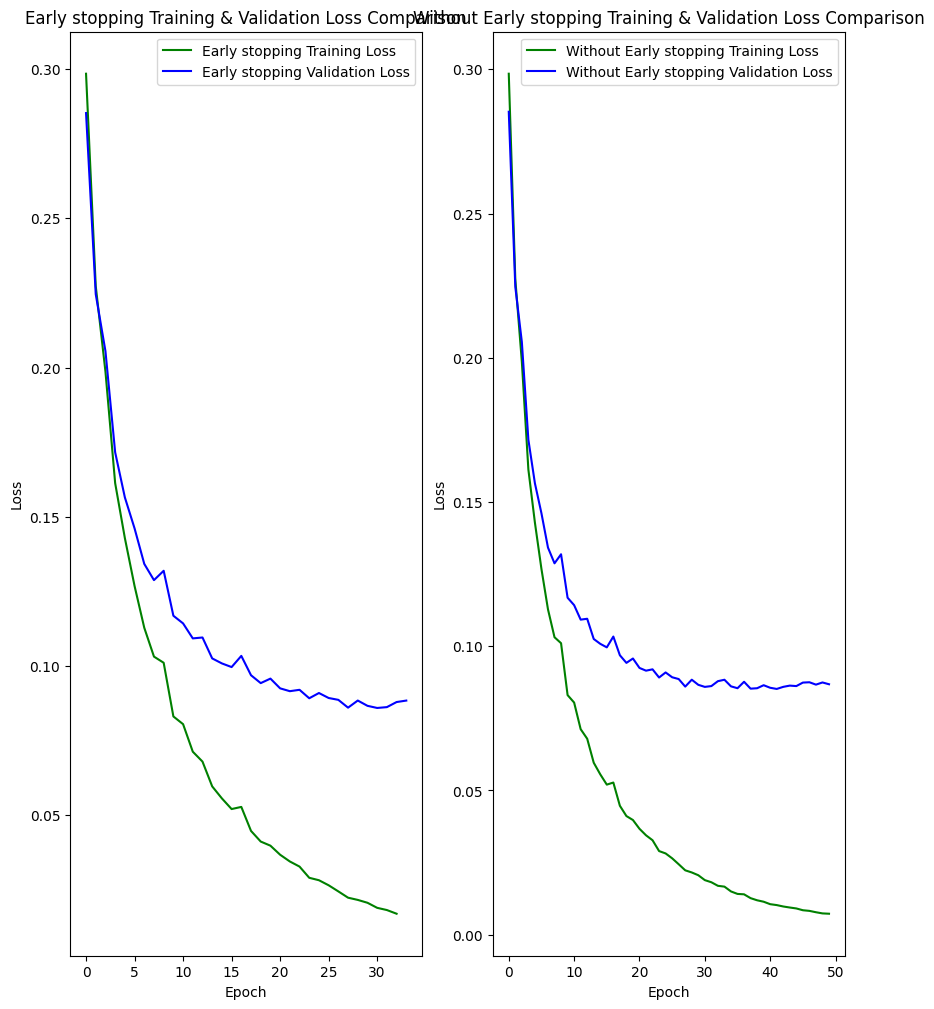

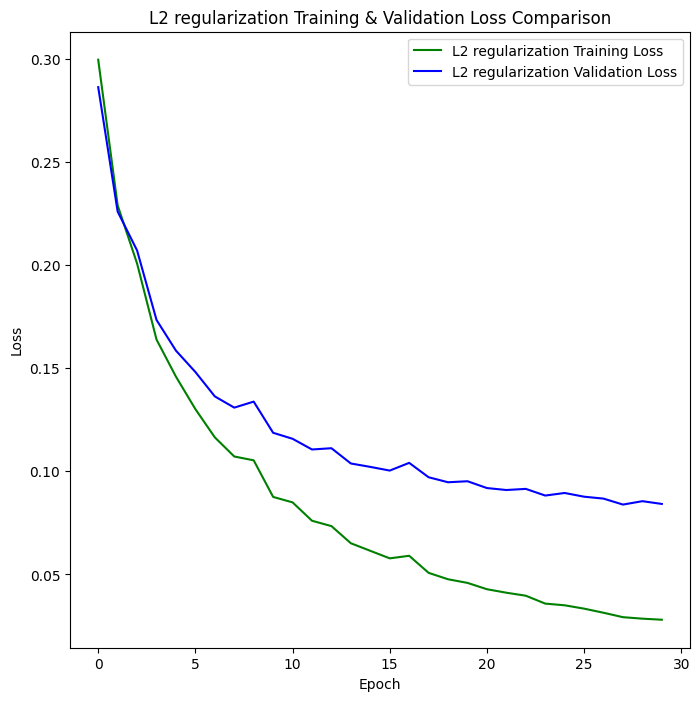

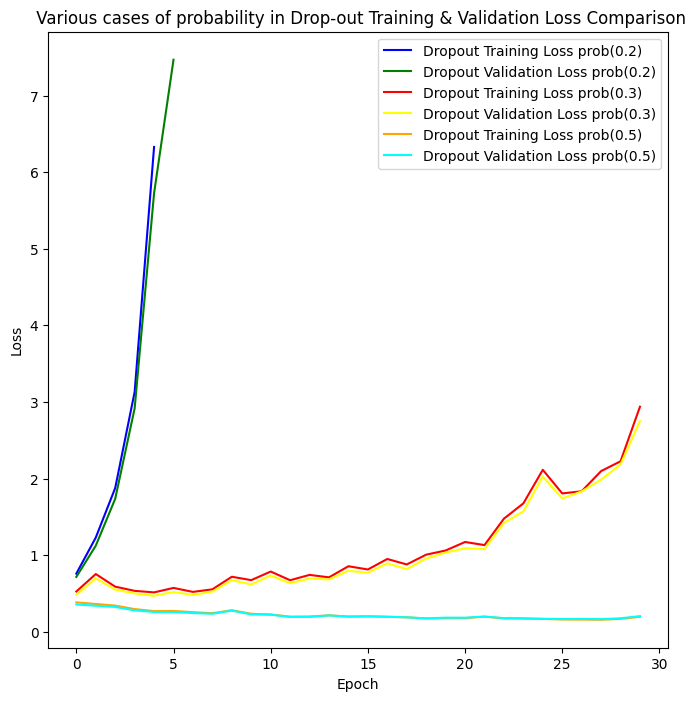

In [151]:
##################################################
#Training with weight regularization
##################################################
# Define the training function with L2 regularization
def train_with_l2_regularization(inputs, targets_idx, activation_func, grad_activation_func, l2_lambda=0.01, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    # Split the training data into two parts.
    split_idx = int(train_val_split * n_samples)
    train_inputs, val_inputs = inputs[:split_idx], inputs[split_idx:]
    train_targets, val_targets = targets_idx[:split_idx], targets_idx[split_idx:]

    # Randomly initialize the weights
    np.random.seed(0)
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]
    train_loss=[]
    val_loss=[]
    # Interate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(train_inputs))
        train_inputs_shuffled = train_inputs[indices]
        train_targets_shuffled = train_targets[indices]

        # Interate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = start_idx + batch_size
            x_batch = train_inputs_shuffled[start_idx:end_idx]
            y_batch = train_targets_shuffled[start_idx:end_idx]

            # Forward propagation
            z1 = np.dot(x_batch, W1)
            a1 = activation_func(z1)
            z2 = np.dot(a1, W2)
            a2 = activation_func(z2)
            z3 = np.dot(a2, W3)
            outp = softmax(z3)
            # Compute L2 regularization term
            m = x_batch.shape[0]
            loss = -np.sum(np.log(outp[range(m), y_batch])) / m
            reg_loss = 0.5 * l2_lambda * (np.sum(W1 * W1) + np.sum(W2 * W2) + np.sum(W3 * W3))
            loss += reg_loss
            # Compute the derivative of loss at parameters
            dz3 = outp
            dz3[range(m), y_batch] -= 1
            dz3 /= m
            dW3 = np.dot(a2.T, dz3) + l2_lambda * W3
            da2 = np.dot(dz3, W3.T)
            dz2 = da2 * grad_activation_func(z2)
            dW2 = np.dot(a1.T, dz2) + l2_lambda * W2
            da1 = np.dot(dz2, W2.T)
            dz1 = da1 * grad_activation_func(z1)
            dW1 = np.dot(x_batch.T, dz1) + l2_lambda * W1
            # Update the weights
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
            W3 -= learning_rate * dW3
        train_accuracy,t_loss = evaluate_accuracy(train_inputs, train_targets, weights, activation_func)
        val_accuracy,v_loss = evaluate_accuracy(val_inputs, val_targets, weights, activation_func)
        train_loss.append(t_loss)
        val_loss.append(v_loss)
        if epoch%10==0 or epoch==(epochs-1):
         print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return weights,train_loss,val_loss

# # # Train the network with L2 regularization
weights_l2_regularization,train_loss_l2,val_loss_l2 = train_with_l2_regularization(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, ReLu, gradReLu)

# Evaluate accuracy on test data
W1, W2, W3 = weights_l2_regularization
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_l2 = np.mean(test_predictions == test_targets)
print("---------------Trained the network with L2-regularization----------------")
print(f"Accuracy with L2 regularization: {test_accuracy_l2:.4f}")
print("#"*100)
print("#"*100)
##################################################
#Training with dropout strategy
##################################################
# Define the training function with dropout
def train_with_dropout(inputs, targets_idx, activation_func, grad_activation_func, dropout_prob=0.2, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    # Split the training data into two parts.
    split_idx = int(train_val_split * n_samples)
    train_inputs, val_inputs = inputs[:split_idx], inputs[split_idx:]
    train_targets, val_targets = targets_idx[:split_idx], targets_idx[split_idx:]
    # Randomly initialize the weights
    np.random.seed(0)
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]
    train_loss=[]
    val_loss=[]
    # Interate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(train_inputs))
        train_inputs_shuffled = train_inputs[indices]
        train_targets_shuffled = train_targets[indices]
        # Interate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = start_idx + batch_size
            x_batch = train_inputs_shuffled[start_idx:end_idx]
            y_batch = train_targets_shuffled[start_idx:end_idx]
            # Forward propagation with dropout (only during training)
            z1 = np.dot(x_batch, W1)
            a1 = activation_func(z1)
            dropout_mask1 = np.random.rand(*a1.shape) < dropout_prob
            a1 *= dropout_mask1 / dropout_prob
            z2 = np.dot(a1, W2)
            a2 = activation_func(z2)
            dropout_mask2 = np.random.rand(*a2.shape) < dropout_prob
            a2 *= dropout_mask2 / dropout_prob
            z3 = np.dot(a2, W3)
            outp = softmax(z3)
            # Backward propagation
            m = x_batch.shape[0]
            # loss = -np.sum(np.log(outp[range(m), y_batch])) / m
            # Compute the derivative of loss at parameters
            dz3 = outp
            dz3[range(m), y_batch] -= 1
            dz3 /= m
            dW3 = np.dot(a2.T, dz3)
            da2 = np.dot(dz3, W3.T)
            dz2 = da2 * grad_activation_func(z2)
            dW2 = np.dot(a1.T, dz2)
            da1 = np.dot(dz2, W2.T)
            dz1 = da1 * grad_activation_func(z1)
            dW1 = np.dot(x_batch.T, dz1)
            # Update the weights
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
            W3 -= learning_rate * dW3
        # Compute training and validation accuracy
        train_accuracy,t_loss = evaluate_accuracy(train_inputs, train_targets, weights, activation_func)
        val_accuracy,v_loss = evaluate_accuracy(val_inputs, val_targets, weights, activation_func)
        train_loss.append(t_loss)
        val_loss.append(v_loss)
        if epoch%10==0 or epoch==(epochs-1):
         print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    return weights, train_loss, val_loss
# # Train the network with dropout
weights_dropout1,train_loss_drop1,val_loss_drop1 = train_with_dropout(mnist_traindata.reshape(-1, 784), mnist_trainlabel, ReLu, gradReLu, dropout_prob=0.2)
print("-------------Trained the network with deopout probability 0.2-------------")
weights_dropout2,train_loss_drop2,val_loss_drop2 = train_with_dropout(mnist_traindata.reshape(-1, 784), mnist_trainlabel, ReLu, gradReLu, dropout_prob=0.3)
print("-------------Trained the network with deopout probability 0.3-------------")
weights_dropout3,train_loss_drop3,val_loss_drop3 = train_with_dropout(mnist_traindata.reshape(-1, 784), mnist_trainlabel, ReLu, gradReLu, dropout_prob=0.5)
print("-------------Trained the network with deopout probability 0.5-------------")
# Evaluate accuracy on test data
W1, W2, W3 = weights_dropout1
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_dropout1 = np.mean(test_predictions == test_targets)

W1, W2, W3 = weights_dropout2
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_dropout2 = np.mean(test_predictions == test_targets)

W1, W2, W3 = weights_dropout3
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_dropout3 = np.mean(test_predictions == test_targets)
print(f"Accuracy with dropout with prob 0.2: {test_accuracy_dropout1:.4f}")
print(f"Accuracy with dropout with prob 0.3: {test_accuracy_dropout2:.4f}")
print(f"Accuracy with dropout with prob 0.5: {test_accuracy_dropout3:.4f}")
##################################################
#Training with early stopping criterion
##################################################
# Define the training function with early stopping
def train_with_early_stopping(inputs, targets_idx, activation_func, grad_activation_func, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001, patience=5):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    # Split the training data into two parts.
    split_idx = int(train_val_split * n_samples)
    train_inputs, val_inputs = inputs[:split_idx], inputs[split_idx:]
    train_targets, val_targets = targets_idx[:split_idx], targets_idx[split_idx:]
    # Randomly initialize the weights
    np.random.seed(0)
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]
    best_val_loss = float('inf')
    no_improvement_count = 0
    best_weights = None
    train_loss=[]
    val_loss=[]
    # Interate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(train_inputs))
        train_inputs_shuffled = train_inputs[indices]
        train_targets_shuffled = train_targets[indices]
        # Interate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = start_idx + batch_size
            x_batch = train_inputs_shuffled[start_idx:end_idx]
            y_batch = train_targets_shuffled[start_idx:end_idx]
            # Forward propagation
            z1 = np.dot(x_batch, W1)
            a1 = activation_func(z1)
            z2 = np.dot(a1, W2)
            a2 = activation_func(z2)
            z3 = np.dot(a2, W3)
            outp = softmax(z3)
            m = x_batch.shape[0]
            # loss = -np.sum(np.log(outp[range(m), y_batch])) / m
            # Compute the derivative of loss at parameters
            dz3 = outp
            dz3[range(m), y_batch] -= 1
            dz3 /= m
            dW3 = np.dot(a2.T, dz3)
            da2 = np.dot(dz3, W3.T)
            dz2 = da2 * grad_activation_func(z2)
            dW2 = np.dot(a1.T, dz2)
            da1 = np.dot(dz2, W2.T)
            dz1 = da1 * grad_activation_func(z1)
            dW1 = np.dot(x_batch.T, dz1)
            # Update the weights
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
            W3 -= learning_rate * dW3
        # Compute validation loss
        val_accuracy,v_loss = evaluate_accuracy(val_inputs, val_targets, weights, activation_func)
        val_loss.append(v_loss)
        
        # Check if validation loss starts to increase
        if epoch > 0 and val_loss[-1] > val_loss[-2]:
            no_improvement_count += 1
            if no_improvement_count >= patience:
                print(f"###--------------------Validation loss started to increase. Stopping training at epoch {epoch}------------------------###")
                break
        else:
            no_improvement_count = 0
        train_accuracy,t_loss = evaluate_accuracy(train_inputs, train_targets, weights, activation_func)
        train_loss.append(t_loss)
        if epoch%10==0 or epoch==(epochs-1):
            print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        # Early stopping
        if v_loss < best_val_loss:
            best_val_loss = v_loss
            best_weights = [np.copy(W1), np.copy(W2), np.copy(W3)]
    return best_weights, train_loss, val_loss
# Train the network with early stopping
print("#"*100)
print("#"*100)
best_weights_early_stopping1,train_loss_early1,val_loss_early1 = train_with_early_stopping(mnist_traindata.reshape(-1, 784), mnist_trainlabel, ReLu,gradReLu,epochs=50,patience=3)
best_weights_early_stopping2,train_loss_early2,val_loss_early2 = train_with_early_stopping(mnist_traindata.reshape(-1, 784), mnist_trainlabel, ReLu,gradReLu,epochs=50,patience=50)
# # Evaluate accuracy on test data
W1, W2, W3 = best_weights_early_stopping1
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_early_stopping1 = np.mean(test_predictions == test_targets)
W1, W2, W3 = best_weights_early_stopping2
test_output, _ = fwdPropagate(test_inputs, [W1, W2, W3])
test_predictions = np.argmax(test_output, axis=1)
test_accuracy_early_stopping2 = np.mean(test_predictions == test_targets)
print("#"*100)
print("#"*100)
print(f"Accuracy with early stopping: {test_accuracy_early_stopping1:.4f}")
print(f"Accuracy without early stopping: {test_accuracy_early_stopping2:.4f}")
plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.plot(train_loss_early1, label='Early stopping Training Loss', color='green')
plt.plot(val_loss_early1, label='Early stopping Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Early stopping Training & Validation Loss Comparison')
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_loss_early2, label='Without Early stopping Training Loss', color='green')
plt.plot(val_loss_early2, label='Without Early stopping Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Without Early stopping Training & Validation Loss Comparison')
plt.legend()
plt.show()
plt.figure(figsize=(8,8))
plt.plot(train_loss_l2, label='L2 regularization Training Loss', color='green')
plt.plot(val_loss_l2, label='L2 regularization Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('L2 regularization Training & Validation Loss Comparison')
plt.legend()
plt.show()
plt.figure(figsize=(8,8))
plt.plot(train_loss_drop1, label='Dropout Training Loss prob(0.2)', color='blue')
plt.plot(val_loss_drop1, label='Dropout Validation Loss prob(0.2)', color='green')
plt.plot(train_loss_drop2, label='Dropout Training Loss prob(0.3)', color='red')
plt.plot(val_loss_drop2, label='Dropout Validation Loss prob(0.3)', color='yellow')
plt.plot(train_loss_drop3, label='Dropout Training Loss prob(0.5)', color='orange')
plt.plot(val_loss_drop3, label='Dropout Validation Loss prob(0.5)', color='cyan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(' Various cases of probability in Drop-out Training & Validation Loss Comparison')
plt.legend()
plt.show()

<b> Report your observations </b>

1. Early Stopping works effectively as the training was stopped at 33 epoch where the validation error increased continusly for 3 epoches. The accuracy without early stopping is 97.42 and with early stopping the accuracy is 97.78%. The difference is 0.4% nearly as it depends on learning rate,data and epoches too.

2. The L2-regularization works effectly as the accuracy is 97.73 and lambdha term is added in computing gradients.

3. The probability of Drop out greatly effects the network as the hidden nodes will be minimized based on it.The drop-out with probability 0.5 performed as compared to 0.2 and 0.3. The accuracy is incrreasing with increase in probability of drop-out as nodes increases.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



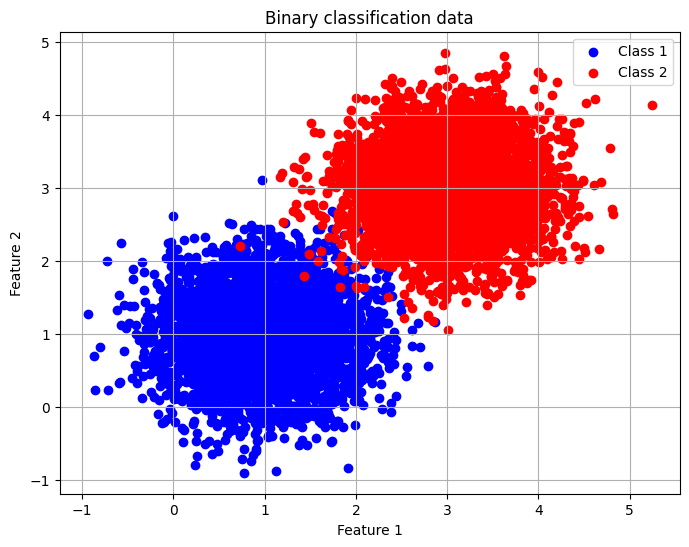

In [125]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

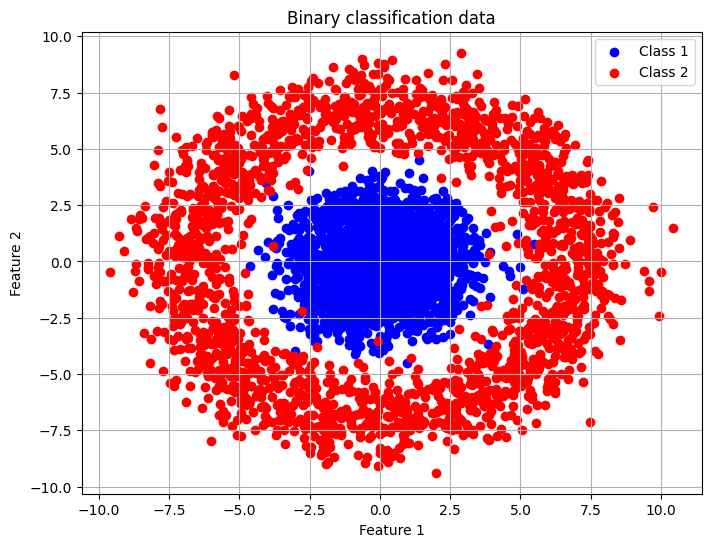

In [126]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Epoch: 0 - Training Accuracy: 0.5007777777777778
Epoch: 1 - Training Accuracy: 0.994
Epoch: 2 - Training Accuracy: 0.9955555555555555
Test Accuracy: 0.995


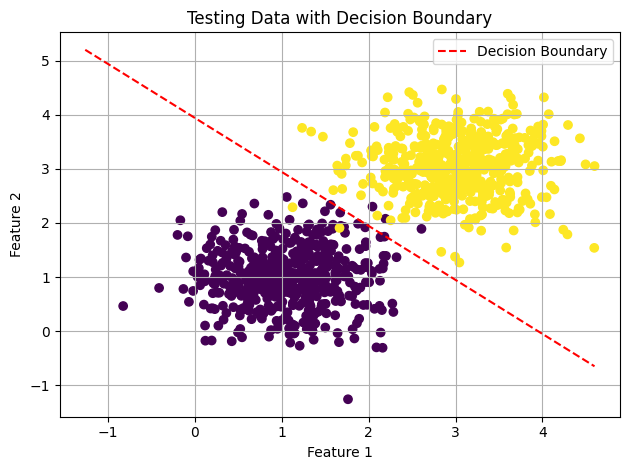

In [165]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def logistic_regression(X_train, Y_train, X_test, max_iter=500, threshold=0.5):
    # Add bias term to input data
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    # Initialize weights
    weights = np.array([0.1, 0.3, 0.1])
    # Training loop
    for iter in range(max_iter):
        # Compute predictions
        preds = sigmoid(X_train @ weights)
        error = preds - Y_train
        # Compute Hessian matrix
        R = np.diag(preds * (1 - preds))
        # Update weights using Newton's method
        z = X_train @ weights - np.linalg.inv(R) @ error
        weights = np.linalg.inv(X_train.T @ R @ X_train) @ X_train.T @ R @ z
        # Compute training accuracy
        train_preds = (preds > threshold).astype(int)
        train_accuracy = np.mean(train_preds == Y_train)
        print(f"Epoch: {iter} - Training Accuracy: {train_accuracy}")
        # Break loop if accuracy threshold is reached
        if train_accuracy > 0.995:
            break
    # Test data predictions
    test_preds = sigmoid(X_test @ weights) > threshold
    return test_preds, weights

# Train logistic regression model
Y_pred, weights = logistic_regression(tr_data, tr_targets, te_data)
# Compute test accuracy
linear_test_accuracy = np.mean(Y_pred == te_targets)
print("Test Accuracy:", linear_test_accuracy)
# Plot decision boundary
x = np.linspace(np.min(te_data), np.max(te_data), 100)
y = -weights[0] / weights[2] - weights[1] / weights[2] * x
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap='viridis')
plt.plot(x, y, 'r--', label='Decision Boundary')
plt.title('Testing Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################




Epoch: 0 - Training Accuracy: 0.4705
Test Accuracy: 0.515


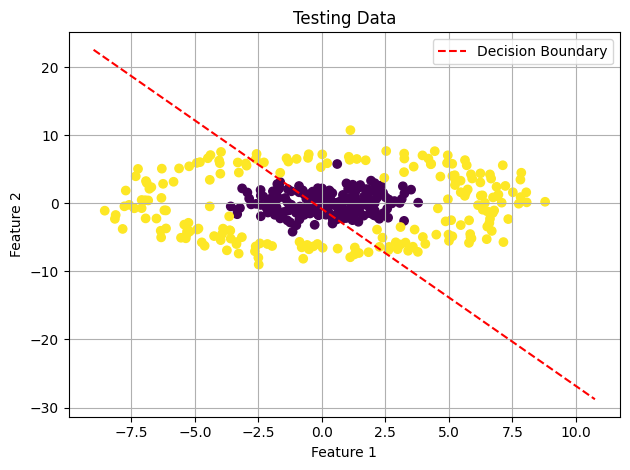

In [164]:
tr_data_circular = np.concatenate([class1_data, class2_data], axis=0)
tr_targets_circular = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])
class1_data_te, class2_data_te = generate_concentric_data(200,radius1,radius2,noise_std)
te_data_circular = np.concatenate([class1_data_te, class2_data_te], axis=0)
te_targets_circular = np.concatenate([np.zeros(len(class1_data_te)), np.ones(len(class2_data_te))])


##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

Y_pred,weights = logistic_regression(tr_data_circular, tr_targets_circular, te_data_circular,max_iter = 1)

linear_test_accuracy = np.mean(Y_pred == te_targets_circular)
print("Test Accuracy:", linear_test_accuracy)

x = np.linspace(np.min(te_data_circular), np.max(te_data_circular), 100)
y = -weights[0] / weights[2] - weights[1] / weights[2] * x
# Plot testing data and decision boundary
plt.scatter(te_data_circular[:, 0], te_data_circular[:, 1], c=te_targets_circular, cmap='viridis')
plt.plot(x, y, 'r--', label='Decision Boundary')
plt.title('Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################







<b> Report your observations </b>

1. The accuracies are almost same for linearly seperable data using logistic regression.

2. For non-linearly seperable data the logistic regression couldn't able to seperate.

3. 

